In [87]:
%load_ext autoreload
%autoreload 2
from metalearning_benchmarks import benchmark_dict, MetaLearningDataset
from matplotlib import pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
bm_name = "Sinusoid1D"
seed = 1234
n_task = 2
output_noise = 0.25
n_datapoints_per_task = 64
n_train = 8
ctx_size_range = (0, 8)
n_ctx_sets_per_task = 16


In [89]:
# generate MetaLearningBenchmark
bm = benchmark_dict[bm_name](
    n_task=n_task,
    n_datapoints_per_task=n_datapoints_per_task,
    output_noise=output_noise,
    seed_x=seed,
    seed_task=seed + 1,
    seed_noise=seed + 2,
)

In [90]:
# generated MetaLearningDataset
ds = MetaLearningDataset(
    metalearning_benchmark=bm,
    n_train=n_train,
    ctx_size_range=ctx_size_range,
    n_ctx_sets_per_task=n_ctx_sets_per_task,
    seed=seed,
)

In [91]:
# print statistics
print(f"Number of tasks    = {ds.bm.n_task}")
print(f"Number of subtasks = {ds.n_subtasks}")
for ctx_size in ds.iter_ctx_sizes():
    x_train, *_ = ds.get_subtasks_by_ctx_size(ctx_size)
    n_subtasks = x_train.shape[0]
    print(f"Number of subtasks (per task) of size {ctx_size:02d} = {n_subtasks // ds.bm.n_task}")

Number of tasks    = 2
Number of subtasks = 32
Number of subtasks (per task) of size 00 = 1
Number of subtasks (per task) of size 01 = 2
Number of subtasks (per task) of size 02 = 2
Number of subtasks (per task) of size 03 = 2
Number of subtasks (per task) of size 04 = 2
Number of subtasks (per task) of size 05 = 2
Number of subtasks (per task) of size 06 = 2
Number of subtasks (per task) of size 07 = 2
Number of subtasks (per task) of size 08 = 1


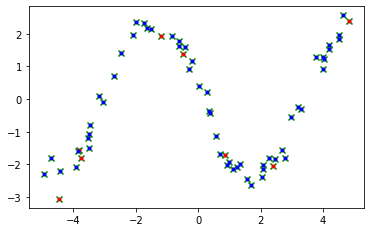

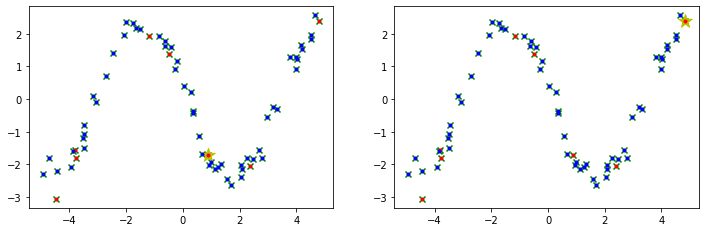

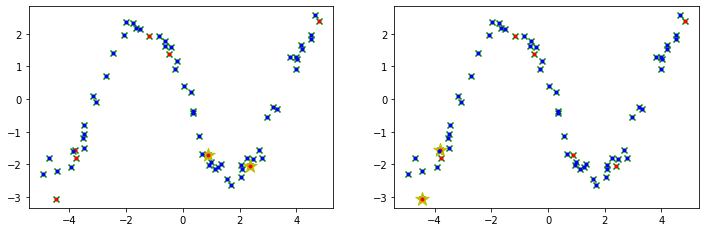

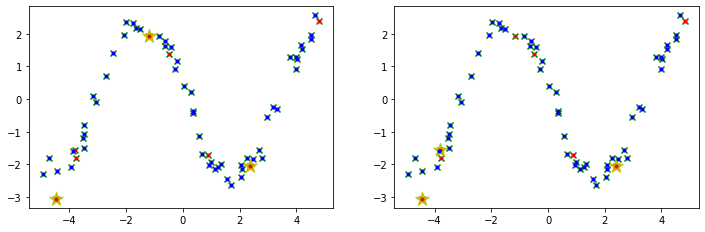

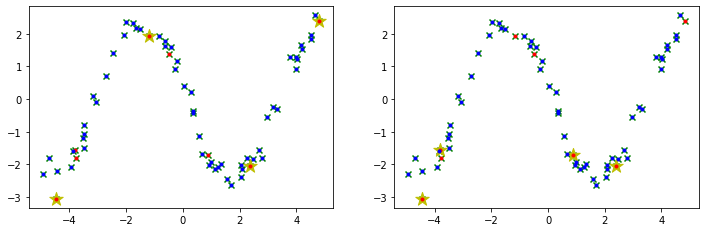

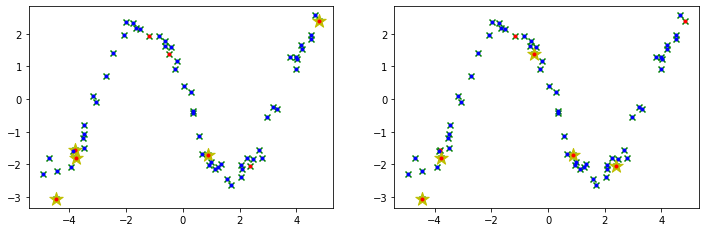

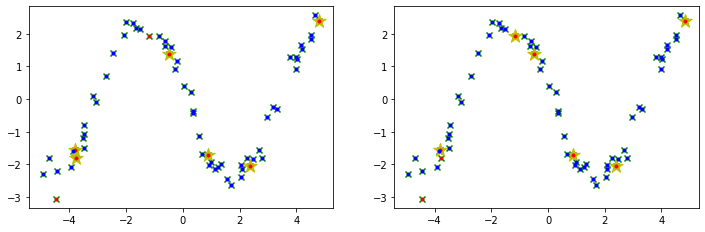

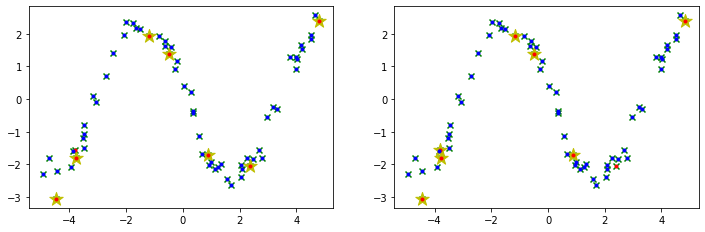

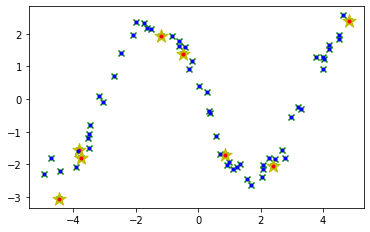

In [92]:
# plotting stuff
golden = (1 + np.sqrt(5)) / 2
x_size = 6

# visualize subtasks
id = 1
x, y = bm.get_task_by_id(id)

for ctx_size in ds.iter_ctx_sizes():
    x_train, y_train, ctx_mask, x_val, y_val, subtask_id = ds.get_subtasks_by_task_id_and_ctx_size(id, ctx_size)
    n_subtasks = x_train.shape[0]
    fig, axes = plt.subplots(nrows=1, ncols=n_subtasks, figsize=(n_subtasks * x_size, x_size / golden), squeeze=False)
    for n in range(n_subtasks):
        ax = axes[0, n]
        x_ctx, y_ctx = x_train[n, ctx_mask[n]], y_train[n, ctx_mask[n]]
        ax.scatter(x.squeeze(-1), y.squeeze(-1), marker="x", color="g", label="all data")
        ax.scatter(x_ctx.squeeze(-1), y_ctx.squeeze(-1), marker="*", s=200, color="y", label="context data")
        ax.scatter(x_train[n].squeeze(-1), y_train[n].squeeze(-1), marker=".", color="r", label="training data")
        ax.scatter(x_val[n].squeeze(-1), y_val[n].squeeze(-1), marker=".", color="b", label="validation data")
        # ax.legend()
plt.show()